In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
import category_encoders as ce
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import xgboost as xgb  
from catboost import CatBoostClassifier


# I. Read dataset

In [2]:
df_encoded=pd.read_csv('04_df_encoded_wonlost.csv', delimiter=',')
df_encoded.head()

,Amount_DE,Amount_HD,Amount_ID,Amount_OTHER,Amount_PP,Amount_PS,Amount_SP,Total_Amount,Resolution_time,Client_type,Market_segment,Client_BU,Country,Client_importance,Coverage_model,Result_offer_binary
0,0.001945,0.0,0.0,0.0,0.00000,0.000000,0.0,0.000718,0.078611,0.456166,1037,3473,1,3,6,0
1,0.002045,0.0,0.1,0.0,0.02803,0.020478,0.0,0.021526,0.235466,0.456166,137,2861,1,3,6,1
2,0.003382,0.0,0.0,0.0,0.00000,0.000005,0.0,0.001252,0.032176,0.456166,248,3473,1,3,6,0
3,0.003382,0.0,0.0,0.0,0.00000,0.000005,0.0,0.001252,0.025229,0.456166,248,3473,1,3,6,0
4,0.003382,0.0,0.0,0.0,0.00000,0.000005,0.0,0.001252,0.025229,0.456166,248,3473,1,3,6,0


# II. ML models Training

## 1. Split

In [3]:
# Define predictors (X) and target (y)
X = df_encoded.drop(columns=['Result_offer_binary'])
y = df_encoded['Result_offer_binary']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

## 2. Training

### XGBoost

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:47:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      2166
           1       0.77      0.87      0.81      3141

    accuracy                           0.77      5307
   macro avg       0.77      0.74      0.75      5307
weighted avg       0.77      0.77      0.76      5307


Accuracy: 0.7665347654041832

ROC AUC Score: 0.8148122425737934

Confusion Matrix:
[[1343  823]
 [ 416 2725]]


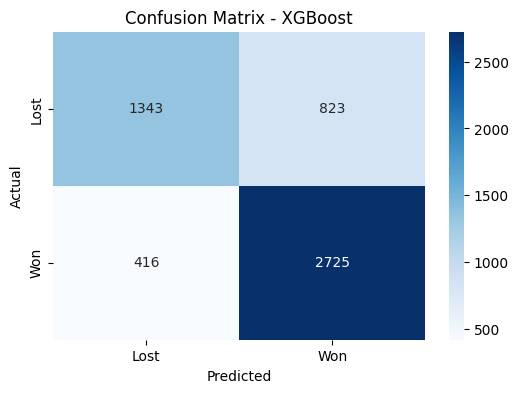

In [4]:
#XGBoost

# Train an XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_predictions = xgb_model.predict(X_test)
xgb_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

# Accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("\nAccuracy:", xgb_accuracy)

# ROC AUC Score
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_prob)
print("\nROC AUC Score:", xgb_roc_auc)

# Confusion Matrix
xgb_cm = confusion_matrix(y_test, xgb_predictions)
print("\nConfusion Matrix:")
print(xgb_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

### Catboost

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.57      0.66      2166
           1       0.75      0.89      0.81      3141

    accuracy                           0.76      5307
   macro avg       0.77      0.73      0.74      5307
weighted avg       0.76      0.76      0.75      5307


Accuracy: 0.7596
ROC AUC Score: 0.8170

Confusion Matrix:
[[1229  937]
 [ 339 2802]]


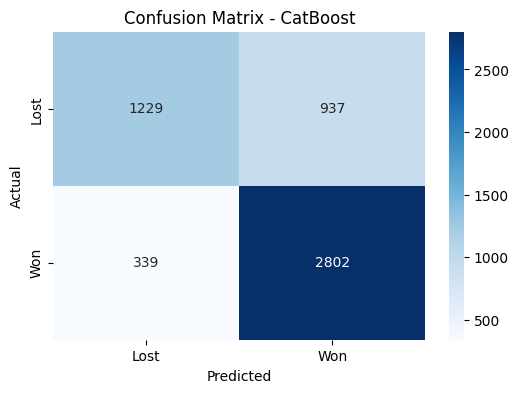

In [5]:
#Catboost

# Initialize and train CatBoost Classifier
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)

# Predict on the test set
catboost_predictions = catboost_model.predict(X_test)
catboost_pred_prob = catboost_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Evaluate the model
print("CatBoost Classification Report:")
print(classification_report(y_test, catboost_predictions))

# Accuracy
accuracy = catboost_model.score(X_test, y_test)
print(f"\nAccuracy: {accuracy:.4f}")

# ROC AUC Score
roc_auc = roc_auc_score(y_test, catboost_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Confusion Matrix
catboost_cm = confusion_matrix(y_test, catboost_predictions)
print("\nConfusion Matrix:")
print(catboost_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(catboost_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()


# III. Performance comparison

In [6]:
#Performance comparison

# Example list of models and their predictions (replace these with your actual models and predictions)
models = {
    "XGBoost": (xgb_model, xgb_predictions, xgb_pred_prob),
    "CatBoost": (catboost_model, catboost_predictions, catboost_pred_prob),
}

# Store metrics for each model
results = {
    "Model": [],
    "Accuracy": [],
    "ROC AUC": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Loop through models and calculate metrics
for model_name, (model, predictions, pred_prob) in models.items():
    accuracy = accuracy_score(y_test, predictions)
    roc_auc = roc_auc_score(y_test, pred_prob)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    # Append results
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["ROC AUC"].append(roc_auc)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)

# Convert to DataFrame for display
results_df = pd.DataFrame(results)

# Print results
print("Model Performance Metrics:")
print(results_df)

# Optional: Save to CSV
# results_df.to_csv('model_performance_metrics.csv', index=False)


Model Performance Metrics:
      Model  Accuracy   ROC AUC  Precision    Recall  F1-Score
0   XGBoost  0.766535  0.814812   0.768038  0.867558  0.814771
1  CatBoost  0.759563  0.816994   0.749398  0.892073  0.814535


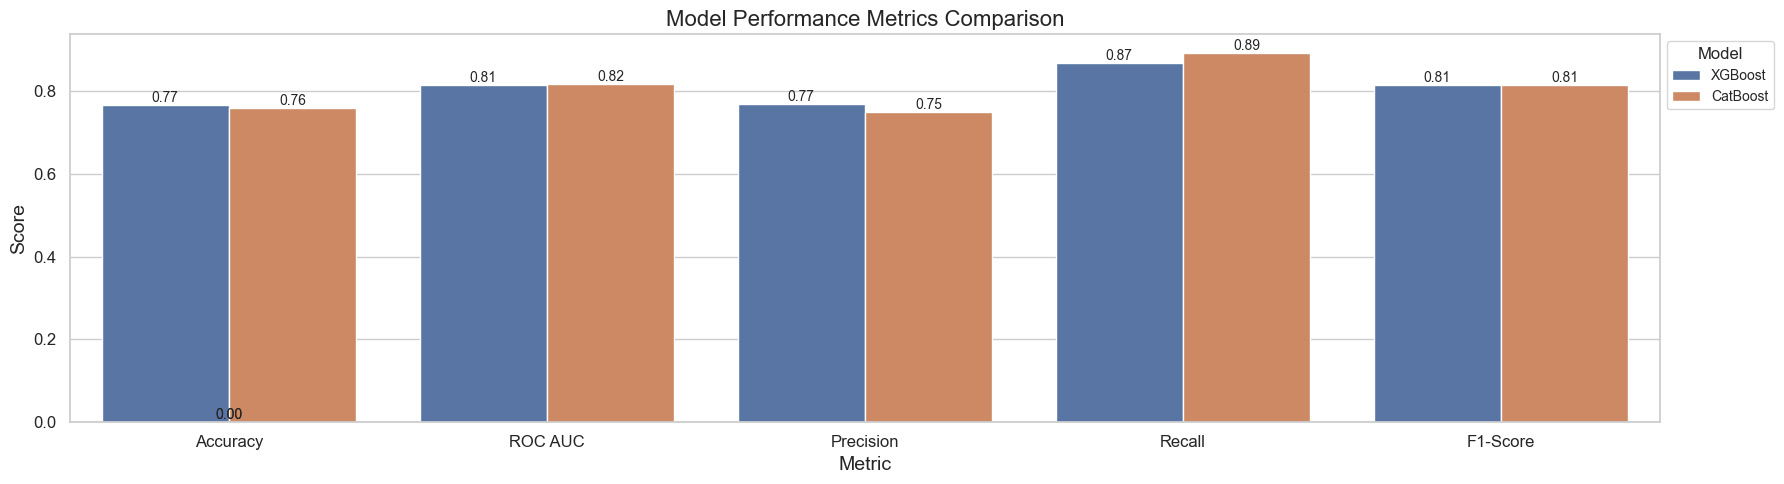

In [7]:
#Performance comparison

# Sort results_df by Accuracy in descending order
results_df_sorted = results_df.sort_values(by="Accuracy", ascending=False)

# Melt the DataFrame for visualization
results_melted = results_df_sorted.melt(id_vars=["Model"], 
                                        var_name="Metric", 
                                        value_name="Score")

# Set up the figure size and style
plt.figure(figsize=(18, 5))
sns.set(style="whitegrid")

# Create a barplot
ax = sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", order=["Accuracy", "ROC AUC", "Precision", "Recall", "F1-Score"])

# Add numbers above the bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'), 
                (bar.get_x() + bar.get_width() / 2., bar.get_height()), 
                ha='center', va='center', size=10, xytext=(0, 5), 
                textcoords='offset points')

# Add labels and title
plt.title("Model Performance Metrics Comparison", fontsize=16)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust legend position
plt.legend(title="Model", fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()


**Analysis**

Bidding team wants to minimize the false positives (predictions as Win but they would actually be Lost):
- XGBoost produces fewer false positives (823) compared to CatBoost (937).

Metric-Specific Analysis:
- Precision: XGBoost (0.77) outperforms CatBoost (0.75), indicating XGBoost is better at minimizing false positives relative to its positive predictions.

- Recall: CatBoost (0.89) has higher recall compared to XGBoost (0.87), showing CatBoost is better at minimizing false negatives.

**Conclusion**
Given our objective, XGBoost is the better choice for its ability to minimize false positives while maintaining good overall performance.

# IV. Feature importance

## 1. Feature Importance

/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_42446/542035357.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance, palette="viridis")


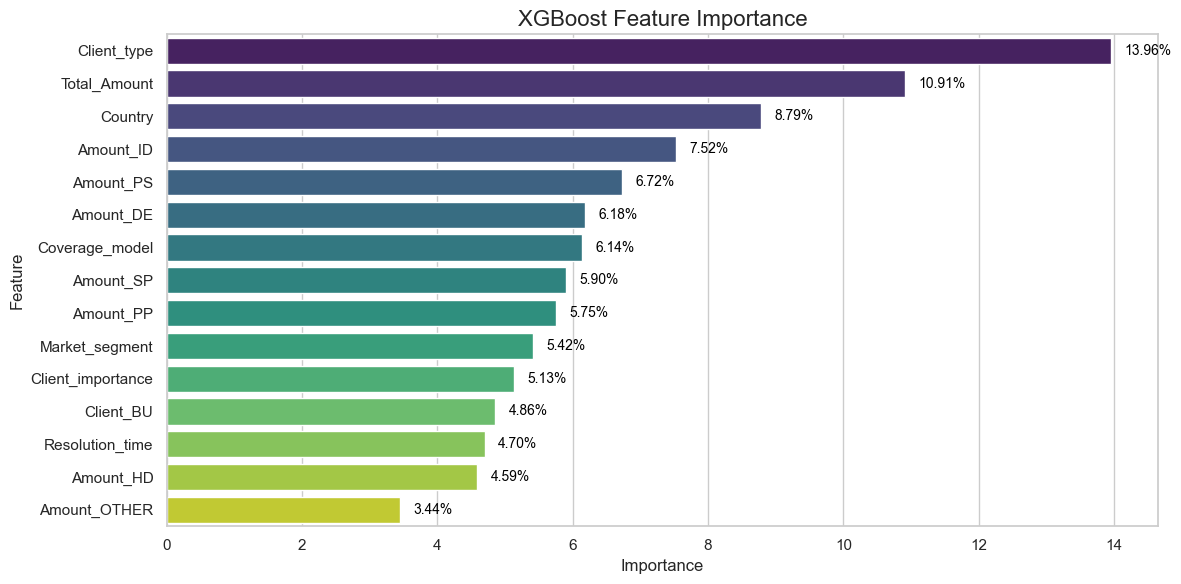

In [8]:
#XGBoost

# Get feature importance
xgb_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Normalize feature importances to percentages
xgb_feature_importance['Importance'] = (
    xgb_feature_importance['Importance'] * 100
)

# Plot feature importance
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Importance', y='Feature', data=xgb_feature_importance, palette="viridis")

# Add annotations for the importance values as percentages
for patch, importance in zip(barplot.patches, xgb_feature_importance['Importance']):
    plt.text(
        x=patch.get_width() + 0.2,  # Position slightly to the right of the bar
        y=patch.get_y() + patch.get_height() / 2,  # Center vertically in the bar
        s=f"{importance:.2f}%",  # Format the importance value as a percentage with 2 decimal places
        va="center",  # Center vertically
        fontsize=10,  # Font size for the annotation
        color="black"  # Color of the text
    )

# Customize the plot
plt.title("XGBoost Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_42446/299994183.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance', y='Feature', data=catboost_feature_importance, palette="viridis")


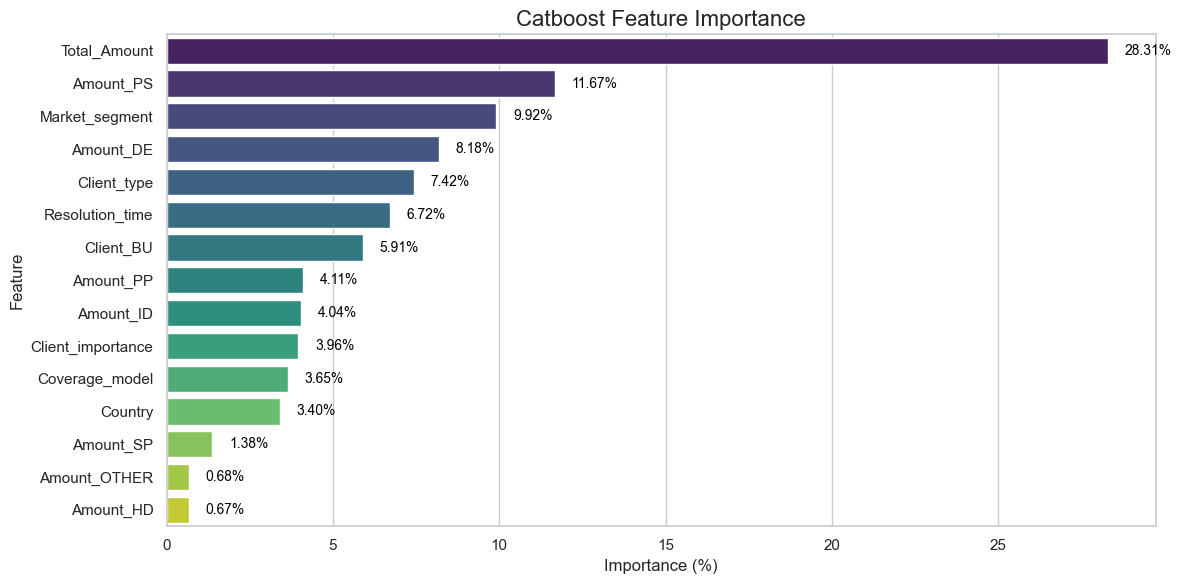

In [9]:
#Catboost

# Get feature importance
catboost_feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': catboost_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Normalize feature importances to percentages
catboost_feature_importance['Importance'] = (
    catboost_feature_importance['Importance'] / catboost_feature_importance['Importance'].sum() * 100
)

# Plot feature importance
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Importance', y='Feature', data=catboost_feature_importance, palette="viridis")

# Add annotations for the importance values as percentages
for patch, importance in zip(barplot.patches, catboost_feature_importance['Importance']):
    plt.text(
        x=patch.get_width() + 0.5,  # Position slightly to the right of the bar
        y=patch.get_y() + patch.get_height() / 2,  # Center vertically in the bar
        s=f"{importance:.2f}%",  # Format the importance value as a percentage with 2 decimal places
        va="center",  # Center vertically
        fontsize=10,  # Font size for the annotation
        color="black"  # Color of the text
    )

# Customize the plot
plt.title("Catboost Feature Importance", fontsize=16)
plt.xlabel("Importance (%)", fontsize=12)  # Update the label to reflect percentages
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
# Feature Importance:

# Print top features for each model

print("\nXGBoost Top Features:")
print(xgb_feature_importance.head())

print("\nCatboost Top Features:")
print(catboost_feature_importance.head())




XGBoost Top Features:
         Feature  Importance
9    Client_type   13.957519
7   Total_Amount   10.908863
12       Country    8.788942
2      Amount_ID    7.521593
5      Amount_PS    6.724771

Catboost Top Features:
           Feature  Importance
7     Total_Amount   28.311496
5        Amount_PS   11.667150
10  Market_segment    9.915897
0        Amount_DE    8.177863
9      Client_type    7.423464


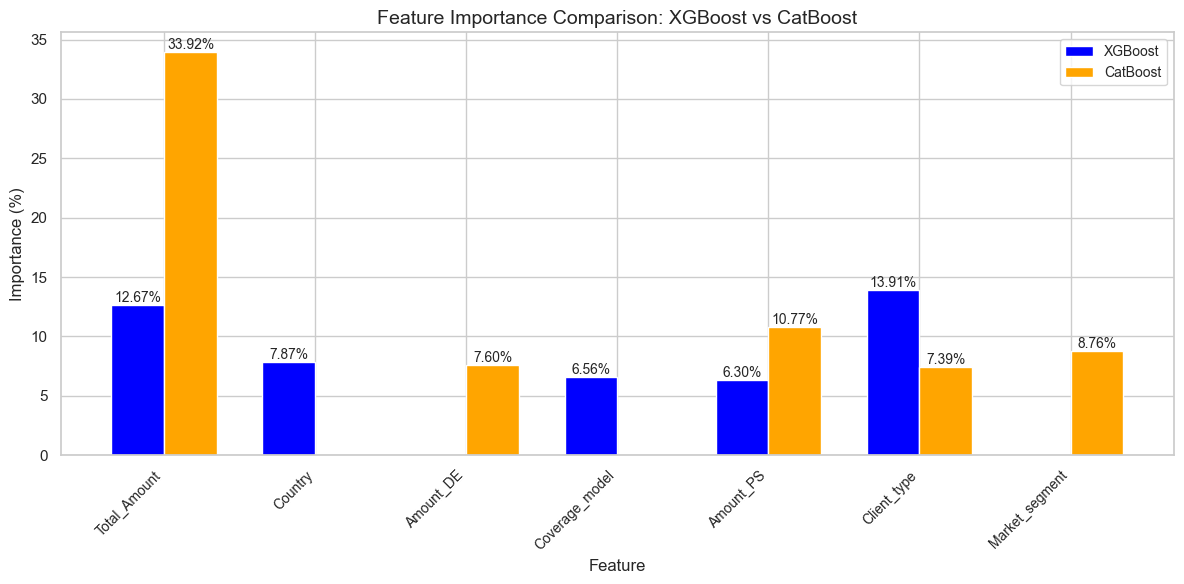

In [11]:
# Visualize Feature Importance Across Models. To visually compare the feature importance rankings
#Workaround so results are comparable

# XGBoost and CatBoost feature importance data
xgb_importance = {
    'Feature': ['Client_type', 'Total_Amount', 'Country', 'Coverage_model', 'Amount_PS'],
    'Importance': [13.913745, 12.665617, 7.871514, 6.560954, 6.304859]
}

cb_importance = {
    'Feature': ['Total_Amount', 'Amount_PS', 'Market_segment', 'Amount_DE', 'Client_type'],
    'Importance': [33.916204, 10.770068, 8.763733, 7.603841, 7.393445]
}

# Convert dictionaries to DataFrames
xgb_df = pd.DataFrame(xgb_importance)
cb_df = pd.DataFrame(cb_importance)

# Combine data for comparison
all_features = set(xgb_df['Feature']).union(cb_df['Feature'])
combined_df = pd.DataFrame({'Feature': list(all_features)})

# Merge the feature importance values
combined_df = combined_df.merge(xgb_df, on='Feature', how='left', suffixes=('', '_XGB'))
combined_df = combined_df.merge(cb_df, on='Feature', how='left', suffixes=('', '_CB'))

# Fill missing values with 0 (for features not present in both models)
combined_df = combined_df.fillna(0)

# Rename columns for clarity
combined_df.columns = ['Feature', 'XGBoost Importance', 'CatBoost Importance']

# Plotting the comparison
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each model
width = 0.35  # Bar width
x = np.arange(len(combined_df['Feature']))
xgb_bars = ax.bar(x - width/2, combined_df['XGBoost Importance'], width, label='XGBoost', color='blue')
cb_bars = ax.bar(x + width/2, combined_df['CatBoost Importance'], width, label='CatBoost', color='orange')

# Add numbers above the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only add labels for non-zero heights
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f"{height:.2f}%",  # Format as percentage
                ha='center',
                va='bottom',
                fontsize=10
            )

add_labels(xgb_bars)
add_labels(cb_bars)

# Formatting the chart
ax.set_xlabel('Feature', fontsize=12)
ax.set_ylabel('Importance (%)', fontsize=12)  # Adjusted for percentage display
ax.set_title('Feature Importance Comparison: XGBoost vs CatBoost', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(combined_df['Feature'], rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


Insights to Derive
Feature Importance Rankings:
Check for consistency in the top features across all models.
Highlight any significant differences in rankings.
Performance Comparison:
Evaluate which model achieves the highest accuracy and better classification metrics.
Select the most suitable model for deployment or further analysis.

## 2. SHAP values

SHAP Values (SHapley Additive exPlanations)

SHAP is one of the most robust methods to explain feature importance. It shows the impact of each feature on individual predictions.

    SHAP values provide a game-theoretic approach to explaining the output of machine learning models.
    They show the contribution of each feature to the prediction for individual samples.


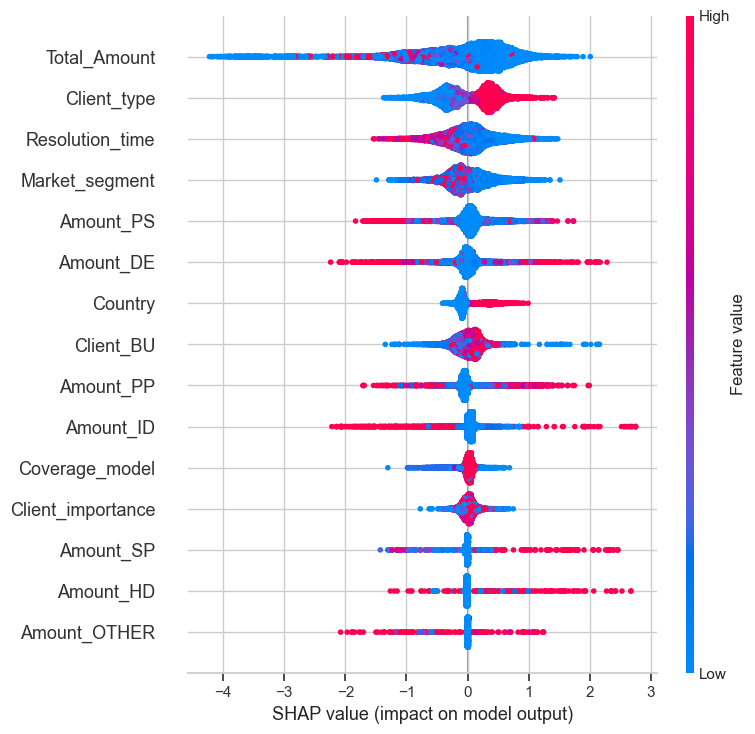

In [12]:
#XG Boost

import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(xgb_model)  # Replace xgb_model with your trained model
shap_values = explainer.shap_values(X)

# Plot the summary of feature contributions
shap.summary_plot(shap_values, X)


This SHAP summary plot reveals:

The relative importance of features (Total_Amount and Client_type are the most influential).
How specific feature values (high or low) drive predictions positively or negatively.

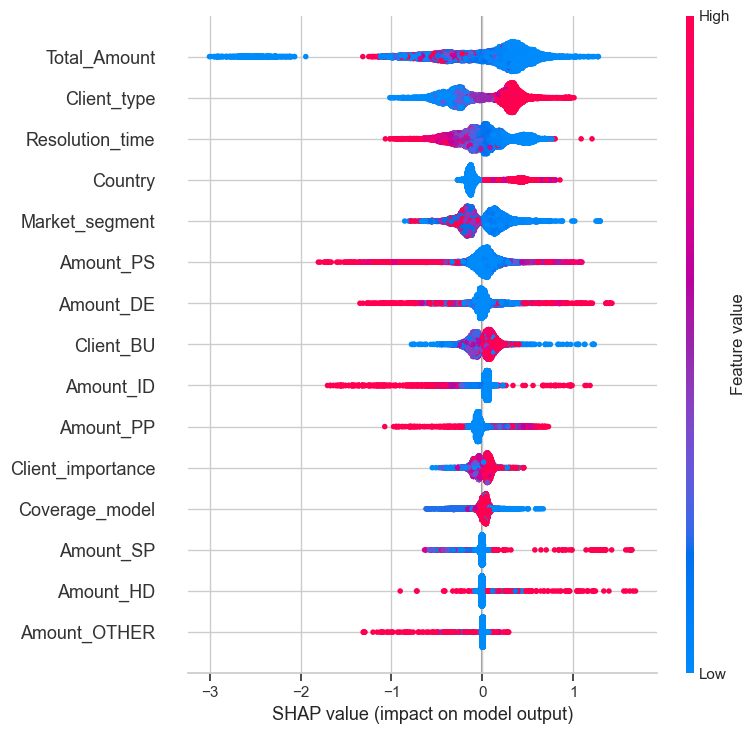

In [13]:
#CATBoost

import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(catboost_model) 
shap_values = explainer.shap_values(X)

# Plot the summary of feature contributions
shap.summary_plot(shap_values, X)


## 3. Permutation importance
Permutation importance measures the impact of each feature on the model's performance by randomly shuffling its values and observing how much the model’s performance decreases as a result. A larger decrease in performance indicates higher importance for that feature.
It helps confirm whether the features identified as important by the model are truly significant.

Key Points in the Plot:
X-Axis (Permutation Importance):

Represents how much the model’s performance decreases when a specific feature is shuffled (rendering it random).
Higher values indicate greater importance because shuffling that feature significantly disrupts the model’s predictions.
Y-Axis (Features):

Lists the features in order of importance, with the most important feature at the top.


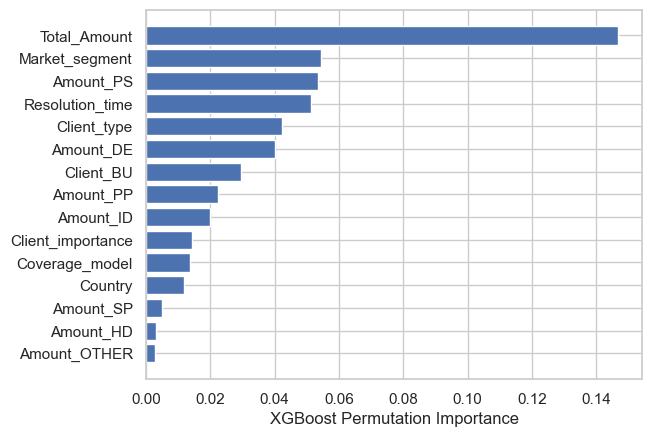

In [14]:
#XGBoost

# Calculate permutation importance
perm_importance = permutation_importance(xgb_model, X, y, n_repeats=10, random_state=42)

# Plot permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("XGBoost Permutation Importance")
plt.show()


Why the Results Differ
XGBoost Built-in Feature Importance:

    Measures feature importance based on the model training process.
    The metrics (e.g., Gain, Cover, or Frequency) focus on the internal decision tree splits, often favoring features with:
    High cardinality (many unique values).
    Frequent usage in splits.

Permutation Importance:

    Measures the true impact of features on predictions by evaluating the change in model performance when feature values are randomly shuffled.
    Focuses on the feature's actual predictive power rather than its role in tree construction.
    Accounts for interactions and correlations between features.

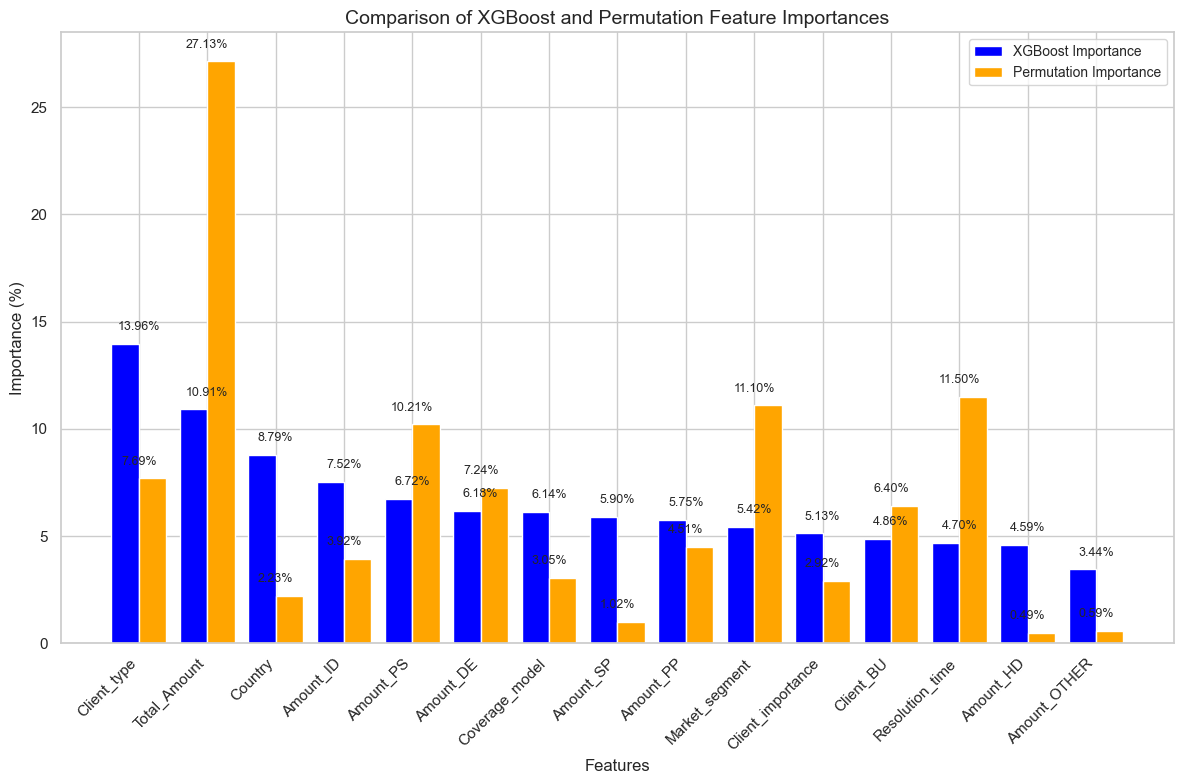

In [15]:
from sklearn.inspection import permutation_importance

# Assume X_train, y_train, and xgb_model are already defined
# X_train: training features
# y_train: target variable
# xgb_model: trained XGBoost model

# Get XGBoost feature importance
xgb_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'XGBoost Importance': xgb_model.feature_importances_
})

# Normalize XGBoost importance values
xgb_importance['XGBoost Importance'] = (
    xgb_importance['XGBoost Importance'] / xgb_importance['XGBoost Importance'].sum()
) * 100

# Calculate permutation importance
perm_importance = permutation_importance(xgb_model, X_train, y_train, scoring='accuracy', random_state=42)
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Permutation Importance': perm_importance['importances_mean']
})

# Normalize permutation importance values
perm_importance_df['Permutation Importance'] = (
    perm_importance_df['Permutation Importance'] / perm_importance_df['Permutation Importance'].sum()
) * 100

# Merge the two importance metrics
comparison_df = pd.merge(
    xgb_importance, perm_importance_df, on='Feature', how='outer'
).fillna(0)  # Fill missing values with 0 for features not found in both methods

# Sort by XGBoost Importance
comparison_df = comparison_df.sort_values(by='XGBoost Importance', ascending=False)

# Plot the comparison
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.4
x = np.arange(len(comparison_df['Feature']))

# Plot XGBoost Importance
ax.bar(x - width/2, comparison_df['XGBoost Importance'], width, label='XGBoost Importance', color='blue')

# Plot Permutation Importance
ax.bar(x + width/2, comparison_df['Permutation Importance'], width, label='Permutation Importance', color='orange')

# Add labels to bars
for bars in [comparison_df['XGBoost Importance'], comparison_df['Permutation Importance']]:
    for bar, height in zip(x, bars):
        ax.text(
            bar,
            height + 0.5,
            f"{height:.2f}%",
            ha='center',
            va='bottom',
            fontsize=9
        )

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Feature'], rotation=45, ha='right')
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Importance (%)', fontsize=12)
ax.set_title('Comparison of XGBoost and Permutation Feature Importances', fontsize=14)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


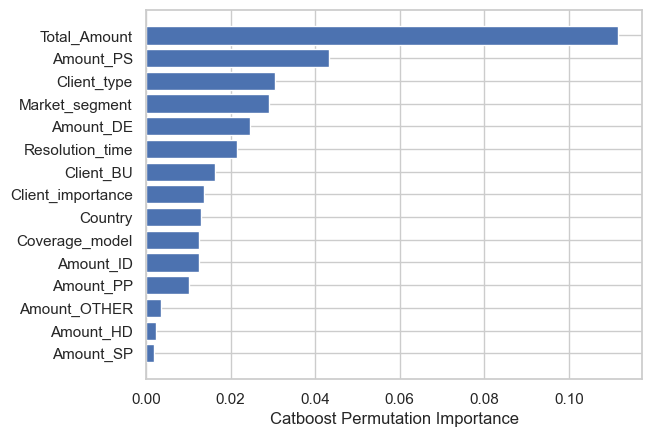

In [16]:
#Catboost

# Calculate permutation importance
perm_importance = permutation_importance(catboost_model, X, y, n_repeats=10, random_state=42)

# Plot permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Catboost Permutation Importance")
plt.show()


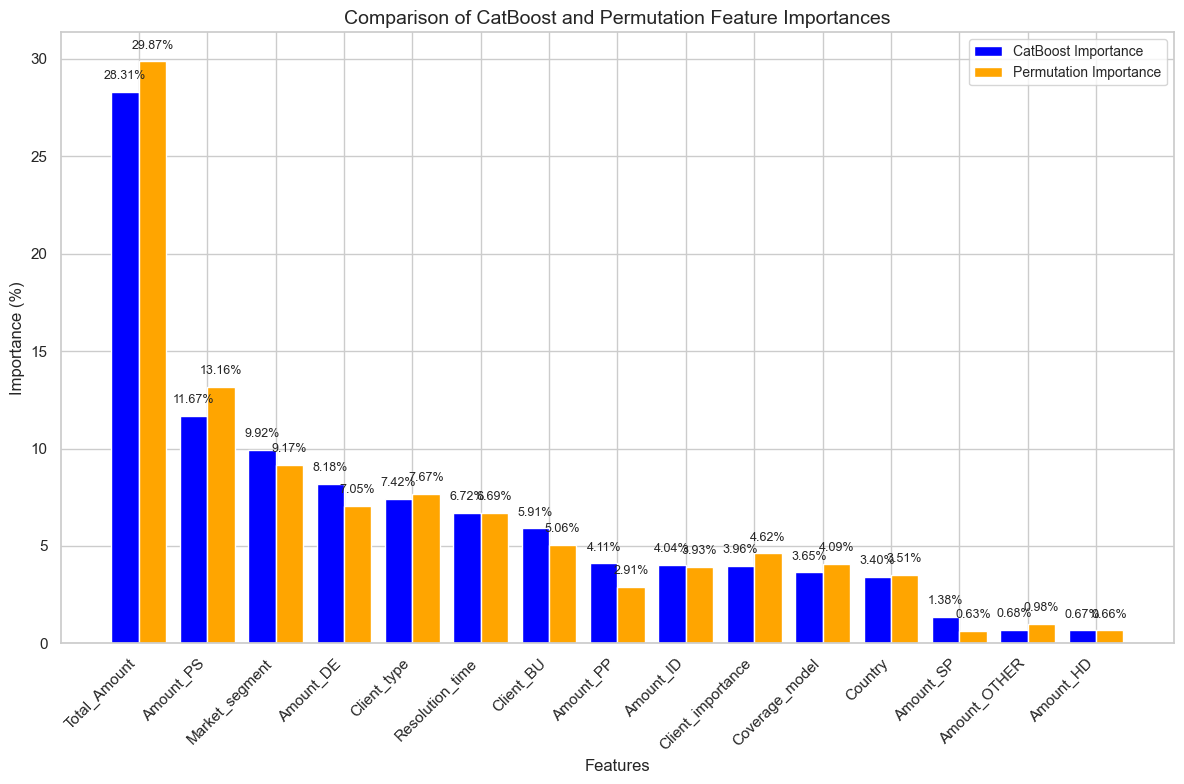

In [17]:
from sklearn.inspection import permutation_importance

# Assume X_train, y_train, and catboost_model are already defined
# X_train: training features
# y_train: target variable
# catboost_model: trained CatBoost model

# Get CatBoost feature importance
catboost_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'CatBoost Importance': catboost_model.get_feature_importance()
})

# Normalize CatBoost importance values
catboost_importance['CatBoost Importance'] = (
    catboost_importance['CatBoost Importance'] / catboost_importance['CatBoost Importance'].sum()
) * 100

# Calculate permutation importance
perm_importance = permutation_importance(catboost_model, X_train, y_train, scoring='accuracy', random_state=42)
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Permutation Importance': perm_importance['importances_mean']
})

# Normalize permutation importance values
perm_importance_df['Permutation Importance'] = (
    perm_importance_df['Permutation Importance'] / perm_importance_df['Permutation Importance'].sum()
) * 100

# Merge the two importance metrics
comparison_df = pd.merge(
    catboost_importance, perm_importance_df, on='Feature', how='outer'
).fillna(0)  # Fill missing values with 0 for features not found in both methods

# Sort by CatBoost Importance
comparison_df = comparison_df.sort_values(by='CatBoost Importance', ascending=False)

# Plot the comparison
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.4
x = np.arange(len(comparison_df['Feature']))

# Plot CatBoost Importance
ax.bar(x - width/2, comparison_df['CatBoost Importance'], width, label='CatBoost Importance', color='blue')

# Plot Permutation Importance
ax.bar(x + width/2, comparison_df['Permutation Importance'], width, label='Permutation Importance', color='orange')

# Add labels to bars
def add_labels(bars, values):
    for bar, value in zip(bars, values):
        ax.text(
            bar,
            value + 0.5,
            f"{value:.2f}%",
            ha='center',
            va='bottom',
            fontsize=9
        )

add_labels(x - width/2, comparison_df['CatBoost Importance'])
add_labels(x + width/2, comparison_df['Permutation Importance'])

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Feature'], rotation=45, ha='right')
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Importance (%)', fontsize=12)
ax.set_title('Comparison of CatBoost and Permutation Feature Importances', fontsize=14)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


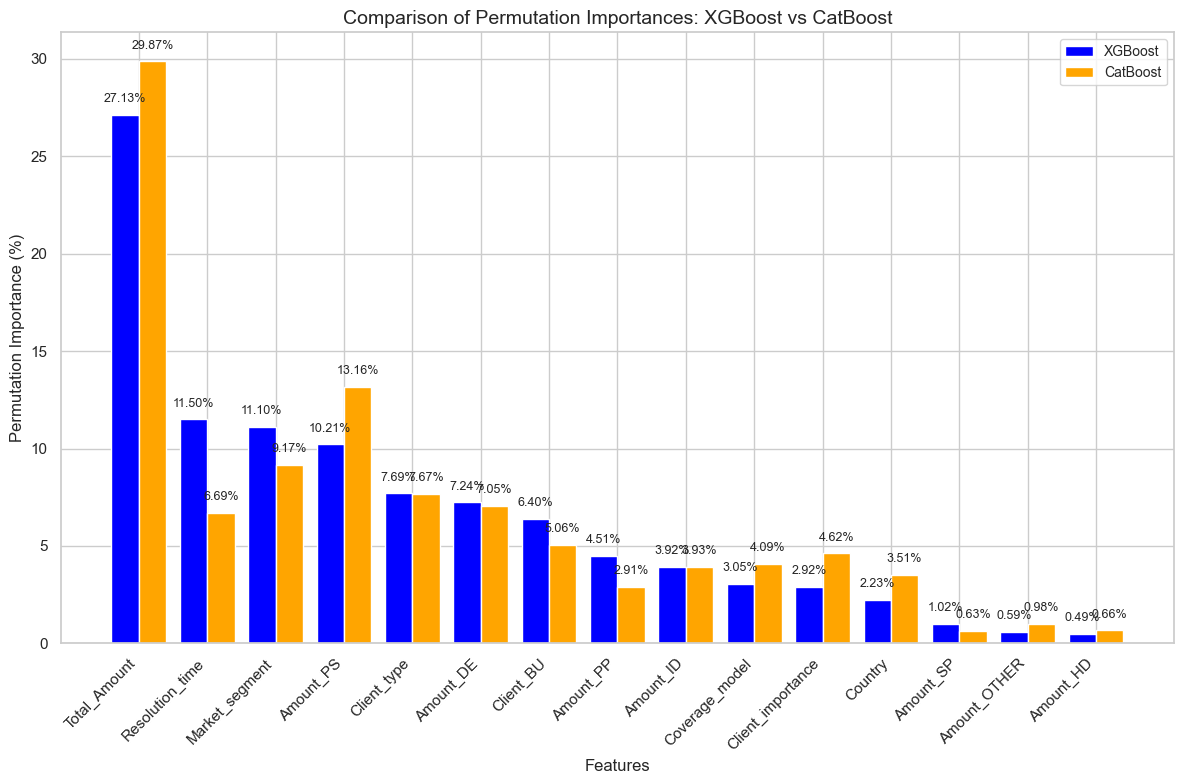

In [18]:
from sklearn.inspection import permutation_importance

# Assume X_train, y_train, xgb_model, and catboost_model are already defined

# Calculate permutation importance for XGBoost
xgb_perm_importance = permutation_importance(
    xgb_model, X_train, y_train, scoring='accuracy', random_state=42
)
xgb_perm_df = pd.DataFrame({
    'Feature': X_train.columns,
    'XGBoost Permutation Importance': xgb_perm_importance['importances_mean']
})

# Calculate permutation importance for CatBoost
catboost_perm_importance = permutation_importance(
    catboost_model, X_train, y_train, scoring='accuracy', random_state=42
)
catboost_perm_df = pd.DataFrame({
    'Feature': X_train.columns,
    'CatBoost Permutation Importance': catboost_perm_importance['importances_mean']
})

# Normalize permutation importance values for both models
xgb_perm_df['XGBoost Permutation Importance'] = (
    xgb_perm_df['XGBoost Permutation Importance'] / xgb_perm_df['XGBoost Permutation Importance'].sum()
) * 100

catboost_perm_df['CatBoost Permutation Importance'] = (
    catboost_perm_df['CatBoost Permutation Importance'] / catboost_perm_df['CatBoost Permutation Importance'].sum()
) * 100

# Merge the results for comparison
comparison_df = pd.merge(
    xgb_perm_df, catboost_perm_df, on='Feature', how='outer'
).fillna(0)  # Fill missing values with 0 for features not found in both models

# Sort by XGBoost Permutation Importance for a consistent order
comparison_df = comparison_df.sort_values(by='XGBoost Permutation Importance', ascending=False)

# Plot the comparison
fig, ax = plt.subplots(figsize=(12, 8))
width = 0.4
x = np.arange(len(comparison_df['Feature']))

# Plot XGBoost Permutation Importance
ax.bar(x - width/2, comparison_df['XGBoost Permutation Importance'], width, label='XGBoost', color='blue')

# Plot CatBoost Permutation Importance
ax.bar(x + width/2, comparison_df['CatBoost Permutation Importance'], width, label='CatBoost', color='orange')

# Add labels to bars
def add_labels(bars, values):
    for bar, value in zip(bars, values):
        ax.text(
            bar,
            value + 0.5,
            f"{value:.2f}%",
            ha='center',
            va='bottom',
            fontsize=9
        )

add_labels(x - width/2, comparison_df['XGBoost Permutation Importance'])
add_labels(x + width/2, comparison_df['CatBoost Permutation Importance'])

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Feature'], rotation=45, ha='right')
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Permutation Importance (%)', fontsize=12)
ax.set_title('Comparison of Permutation Importances: XGBoost vs CatBoost', fontsize=14)
ax.legend(fontsize=10)

plt.tight_layout()
plt.show()


# V. Retrain with adjusted weights based on permutation importance

In [19]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# from sklearn.inspection import permutation_importance
# from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Step 1: Calculate Permutation Importance
# perm_importance = permutation_importance(
#     xgb_model, X_train, y_train, scoring='accuracy', n_repeats=10, random_state=42
# )
# perm_importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Permutation Importance': perm_importance['importances_mean']
# })

# # Step 2: Normalize Permutation Importance to Get Feature Weights
# perm_importance_df['Normalized Weight'] = (
#     perm_importance_df['Permutation Importance'] / perm_importance_df['Permutation Importance'].sum()
# )

# # Debugging: Verify Permutation Importance and Normalized Weights
# print("\nPermutation Importance and Normalized Weights:")
# print(perm_importance_df)

# # Step 3: Create Feature Weights Array
# weights_array = np.array([
#     perm_importance_df.set_index('Feature').loc[feature, 'Normalized Weight'] 
#     for feature in X_train.columns
# ])

# # Debugging: Verify the Alignment of Features and Weights
# print("\nFeature Weights Array (Aligned with X_train Columns):")
# print(weights_array)

# # Step 4: Retrain the XGBoost Model Using Feature Weights
# xgb_model_adjusted = xgb.XGBClassifier(
#     use_label_encoder=False,  # Suppress warnings
#     eval_metric='logloss',
#     random_state=42,
#     feature_weights=weights_array  # Pass the calculated weights
# )

# # Fit the adjusted model
# xgb_model_adjusted.fit(X_train, y_train)

# # Step 5: Predict and Evaluate the Adjusted Model
# # Predictions and probabilities
# xgb_adjusted_predictions = xgb_model_adjusted.predict(X_test)
# xgb_adjusted_pred_prob = xgb_model_adjusted.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# # Classification Report
# print("\nAdjusted XGBoost Classification Report:")
# print(classification_report(y_test, xgb_adjusted_predictions))

# # Accuracy
# xgb_adjusted_accuracy = accuracy_score(y_test, xgb_adjusted_predictions)
# print("\nAdjusted Accuracy:", xgb_adjusted_accuracy)

# # ROC AUC Score
# xgb_adjusted_roc_auc = roc_auc_score(y_test, xgb_adjusted_pred_prob)
# print("\nAdjusted ROC AUC Score:", xgb_adjusted_roc_auc)

# # Confusion Matrix
# xgb_adjusted_cm = confusion_matrix(y_test, xgb_adjusted_predictions)
# print("\nAdjusted Confusion Matrix:")
# print(xgb_adjusted_cm)

# # Visualize Confusion Matrix
# plt.figure(figsize=(6, 4))
# sns.heatmap(
#     xgb_adjusted_cm, annot=True, fmt='d', cmap='Blues',
#     xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won']
# )
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix - Adjusted XGBoost')
# plt.show()

# # Step 6: Compare Adjusted Model to Original Model
# print("\nComparison:")
# print(f"Original Accuracy: {accuracy_score(y_test, xgb_model.predict(X_test)):.4f}")
# print(f"Adjusted Accuracy: {xgb_adjusted_accuracy:.4f}")
# print(f"Original ROC AUC: {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]):.4f}")
# print(f"Adjusted ROC AUC: {xgb_adjusted_roc_auc:.4f}")


In [20]:

# import pandas as pd
# import numpy as np
# import xgboost as xgb
# from sklearn.inspection import permutation_importance
# from sklearn.metrics import accuracy_score

# # Step 1: Calculate Permutation Importance
# perm_importance = permutation_importance(
#     xgb_model, X_train, y_train, scoring='accuracy', n_repeats=10, random_state=42
# )
# perm_importance_df = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Permutation Importance': perm_importance['importances_mean']
# })

# # Step 2: Normalize Permutation Importance to Get Feature Weights
# perm_importance_df['Normalized Weight'] = (
#     perm_importance_df['Permutation Importance'] / perm_importance_df['Permutation Importance'].sum()
# )

# # Step 3: Create a Dictionary of Feature Weights
# feature_weights = {
#     feature: weight for feature, weight in zip(perm_importance_df['Feature'], perm_importance_df['Normalized Weight'])
# }

# # Step 4: Convert Feature Weights to Array Format for XGBoost
# weights_array = np.array([feature_weights[feature] for feature in X_train.columns])

# # Debugging: Verify Feature Weights and Alignment
# print("\nFeature Weights:")
# print(weights_array)

# # Step 5: Retrain the XGBoost Model Using Feature Weights
# xgb_model_adjusted = xgb.XGBClassifier(
#     feature_weights=weights_array,  # Pass the calculated weights
#     random_state=42,
#     use_label_encoder=False,  # Suppress warnings
#     eval_metric='logloss'  # Add evaluation metric
# )

# # Fit the adjusted model
# xgb_model_adjusted.fit(X_train,y_train)

# # Step 6: Evaluate the Adjusted Model
# # Training accuracy
# adjusted_training_accuracy = xgb_model_adjusted.score(X_train, y_train)
# print(f"Adjusted Model Training Accuracy: {adjusted_training_accuracy:.4f}")

# # Validation accuracy
# adjusted_validation_accuracy = accuracy_score(y_test, xgb_model_adjusted.predict(X_test))
# print(f"Adjusted Model Validation Accuracy: {adjusted_validation_accuracy:.4f}")

# # Step 7: Compare with Original Model
# # Original training accuracy
# original_training_accuracy = xgb_model.score(X_train, y_train)
# print(f"Original Model Training Accuracy: {original_training_accuracy:.4f}")

# # Original validation accuracy
# original_validation_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
# print(f"Original Model Validation Accuracy: {original_validation_accuracy:.4f}")

# # Optional: Compare the feature importances
# print("\nFeature Importances (Adjusted Model):")
# print(xgb_model_adjusted.feature_importances_)

# print("\nFeature Importances (Original Model):")
# print(xgb_model.feature_importances_)



In [21]:
# XGBoost

# Step 1: Calculate Permutation Importance
perm_importance = permutation_importance(
    xgb_model, X_train, y_train, scoring='accuracy', n_repeats=10, random_state=42
)
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Permutation Importance': perm_importance['importances_mean']
})

# Step 2: Normalize Permutation Importance to Get Feature Weights
perm_importance_df['Normalized Weight'] = (
    perm_importance_df['Permutation Importance'] / perm_importance_df['Permutation Importance'].sum()
)

# Step 3: Create a Dictionary of Feature Weights
feature_weights = {
    feature: weight for feature, weight in zip(perm_importance_df['Feature'], perm_importance_df['Normalized Weight'])
}

# Step 4: Convert Feature Weights to Array Format for XGBoost
weights_array = np.array([feature_weights[feature] for feature in X_train.columns])

# Step 5: Retrain the XGBoost Model Using Feature Weights
xgb_model_adjusted = xgb.XGBClassifier(
    feature_weights=weights_array,  # Pass the calculated weights
    random_state=42
)

# Fit the model
xgb_model_adjusted.fit(X_train, y_train)

# Step 6: Evaluate the Adjusted Model
accuracy = xgb_model_adjusted.score(X_train, y_train)
print(f"Adjusted Model Training Accuracy: {accuracy:.4f}")

# Step 7: Compare with Original Model
original_accuracy = xgb_model.score(X_train, y_train)
print(f"Original Model Training Accuracy: {original_accuracy:.4f}")


Adjusted Model Training Accuracy: 0.8967
Original Model Training Accuracy: 0.8967


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:47:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "feature_weights" } are not used.

  warnings.warn(smsg, UserWarning)


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [13:47:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "feature_weights", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Adjusted XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      2166
           1       0.77      0.87      0.81      3141

    accuracy                           0.77      5307
   macro avg       0.77      0.74      0.75      5307
weighted avg       0.77      0.77      0.76      5307


Adjusted Accuracy: 0.7665347654041832

Adjusted ROC AUC Score: 0.8148122425737934

Adjusted Confusion Matrix:
[[1343  823]
 [ 416 2725]]


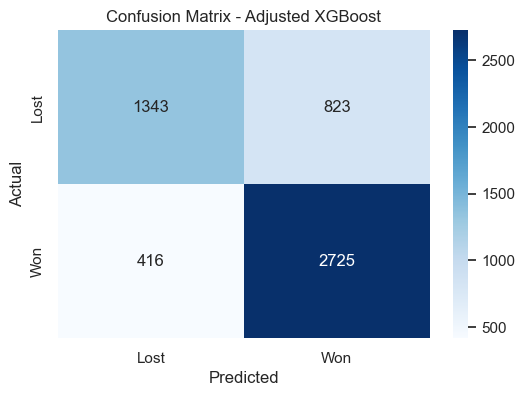


Comparison:
Original Accuracy: 0.7665
Adjusted Accuracy: 0.7665
Original ROC AUC: 0.8148
Adjusted ROC AUC: 0.8148


In [22]:
# Step 1: Calculate Permutation Importance
perm_importance = permutation_importance(
    xgb_model, X_train, y_train, scoring='accuracy', n_repeats=10, random_state=42
)
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Permutation Importance': perm_importance['importances_mean']
})

# Step 2: Normalize Permutation Importance to Get Feature Weights
perm_importance_df['Normalized Weight'] = (
    perm_importance_df['Permutation Importance'] / perm_importance_df['Permutation Importance'].sum()
)

# Step 3: Create a Dictionary of Feature Weights
feature_weights = {
    feature: weight for feature, weight in zip(perm_importance_df['Feature'], perm_importance_df['Normalized Weight'])
}

# Step 4: Convert Feature Weights to Array Format for XGBoost
weights_array = np.array([feature_weights[feature] for feature in X_train.columns])

# Step 5: Retrain the XGBoost Model Using Feature Weights
xgb_model_adjusted = xgb.XGBClassifier(
    use_label_encoder=False,  # Suppress warnings
    eval_metric='logloss',
    random_state=42,
    feature_weights=weights_array  # Pass the calculated weights
)

# Fit the adjusted model
xgb_model_adjusted.fit(X_train, y_train)

# Step 6: Predict and Evaluate the Adjusted Model
# Predictions and probabilities
xgb_adjusted_predictions = xgb_model_adjusted.predict(X_test)
xgb_adjusted_pred_prob = xgb_model_adjusted.predict_proba(X_test)[:, 1]  # Predicted probabilities for ROC AUC

# Classification Report
print("Adjusted XGBoost Classification Report:")
print(classification_report(y_test, xgb_adjusted_predictions))

# Accuracy
xgb_adjusted_accuracy = accuracy_score(y_test, xgb_adjusted_predictions)
print("\nAdjusted Accuracy:", xgb_adjusted_accuracy)

# ROC AUC Score
xgb_adjusted_roc_auc = roc_auc_score(y_test, xgb_adjusted_pred_prob)
print("\nAdjusted ROC AUC Score:", xgb_adjusted_roc_auc)

# Confusion Matrix
xgb_adjusted_cm = confusion_matrix(y_test, xgb_adjusted_predictions)
print("\nAdjusted Confusion Matrix:")
print(xgb_adjusted_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    xgb_adjusted_cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Adjusted XGBoost')
plt.show()

# Compare Adjusted Model to Original Model
print("\nComparison:")
print(f"Original Accuracy: {accuracy_score(y_test, xgb_model.predict(X_test)):.4f}")
print(f"Adjusted Accuracy: {xgb_adjusted_accuracy:.4f}")
print(f"Original ROC AUC: {roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]):.4f}")
print(f"Adjusted ROC AUC: {xgb_adjusted_roc_auc:.4f}")


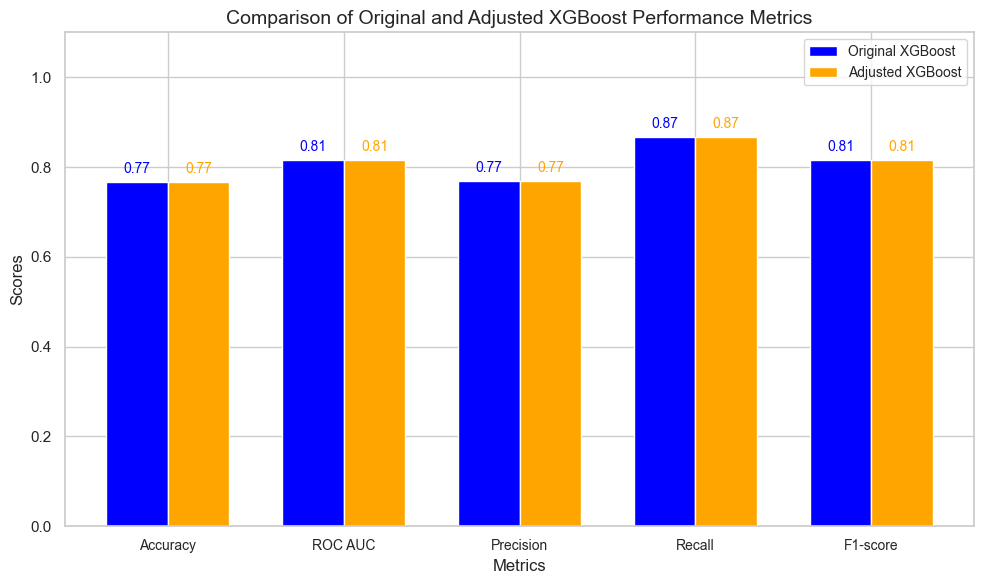

In [23]:

# Calculate Metrics for Original Model
original_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))
original_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
original_precision = precision_score(y_test, xgb_model.predict(X_test))
original_recall = recall_score(y_test, xgb_model.predict(X_test))
original_f1 = f1_score(y_test, xgb_model.predict(X_test))

# Calculate Metrics for Adjusted Model
adjusted_accuracy = accuracy_score(y_test, xgb_model_adjusted.predict(X_test))
adjusted_roc_auc = roc_auc_score(y_test, xgb_model_adjusted.predict_proba(X_test)[:, 1])
adjusted_precision = precision_score(y_test, xgb_model_adjusted.predict(X_test))
adjusted_recall = recall_score(y_test, xgb_model_adjusted.predict(X_test))
adjusted_f1 = f1_score(y_test, xgb_model_adjusted.predict(X_test))

# Metrics and Labels
metrics = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score']
original_values = [original_accuracy, original_roc_auc, original_precision, original_recall, original_f1]
adjusted_values = [adjusted_accuracy, adjusted_roc_auc, adjusted_precision, adjusted_recall, adjusted_f1]

# Bar Chart
x = np.arange(len(metrics))  # Metric positions
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, original_values, width, label='Original XGBoost', color='blue')
plt.bar(x + width/2, adjusted_values, width, label='Adjusted XGBoost', color='orange')

# Add Labels and Formatting
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Original and Adjusted XGBoost Performance Metrics', fontsize=14)
plt.xticks(x, metrics, fontsize=10)
plt.ylim(0, 1.1)  # Ensure all bars fit in range
plt.legend(fontsize=10)

# Annotate Bar Values
for i, (orig, adj) in enumerate(zip(original_values, adjusted_values)):
    plt.text(i - width/2, orig + 0.02, f"{orig:.2f}", ha='center', fontsize=10, color='blue')
    plt.text(i + width/2, adj + 0.02, f"{adj:.2f}", ha='center', fontsize=10, color='orange')

plt.tight_layout()
plt.show()


Adjusted CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.57      0.66      2166
           1       0.75      0.89      0.81      3141

    accuracy                           0.76      5307
   macro avg       0.76      0.73      0.74      5307
weighted avg       0.76      0.76      0.75      5307


Adjusted Accuracy: 0.7581
Adjusted ROC AUC Score: 0.8131

Adjusted Confusion Matrix:
[[1239  927]
 [ 357 2784]]


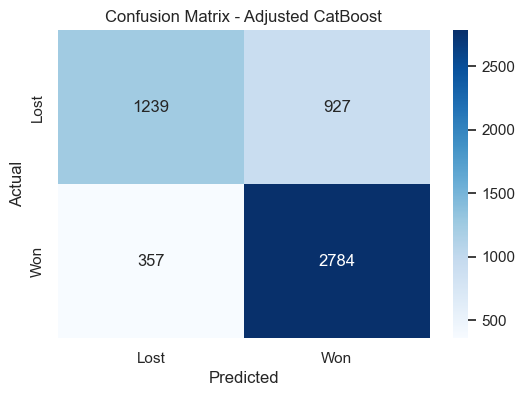

In [24]:
#Catboost

# Step 1: Calculate Permutation Importance for CatBoost
perm_importance = permutation_importance(
    catboost_model, X_train, y_train, scoring='accuracy', n_repeats=10, random_state=42
)
perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Permutation Importance': perm_importance['importances_mean']
})

# Step 2: Normalize Permutation Importance to Get Feature Weights
perm_importance_df['Normalized Weight'] = (
    perm_importance_df['Permutation Importance'] / perm_importance_df['Permutation Importance'].sum()
)

# Step 3: Adjust Feature Weights in CatBoost
feature_weights = perm_importance_df['Normalized Weight'].values

catboost_model_adjusted = CatBoostClassifier(
    verbose=0, 
    random_state=42,
    feature_weights=feature_weights  # Pass normalized weights
)

# Fit the adjusted CatBoost model
catboost_model_adjusted.fit(X_train, y_train)

# Step 4: Predict and Evaluate Adjusted Model
# Predictions and probabilities
catboost_adjusted_predictions = catboost_model_adjusted.predict(X_test)
catboost_adjusted_pred_prob = catboost_model_adjusted.predict_proba(X_test)[:, 1]

# Classification Report
print("Adjusted CatBoost Classification Report:")
print(classification_report(y_test, catboost_adjusted_predictions))

# Accuracy
catboost_adjusted_accuracy = accuracy_score(y_test, catboost_adjusted_predictions)
print(f"\nAdjusted Accuracy: {catboost_adjusted_accuracy:.4f}")

# ROC AUC Score
catboost_adjusted_roc_auc = roc_auc_score(y_test, catboost_adjusted_pred_prob)
print(f"Adjusted ROC AUC Score: {catboost_adjusted_roc_auc:.4f}")

# Confusion Matrix
catboost_adjusted_cm = confusion_matrix(y_test, catboost_adjusted_predictions)
print("\nAdjusted Confusion Matrix:")
print(catboost_adjusted_cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(
    catboost_adjusted_cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Lost', 'Won'], yticklabels=['Lost', 'Won']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Adjusted CatBoost')
plt.show()


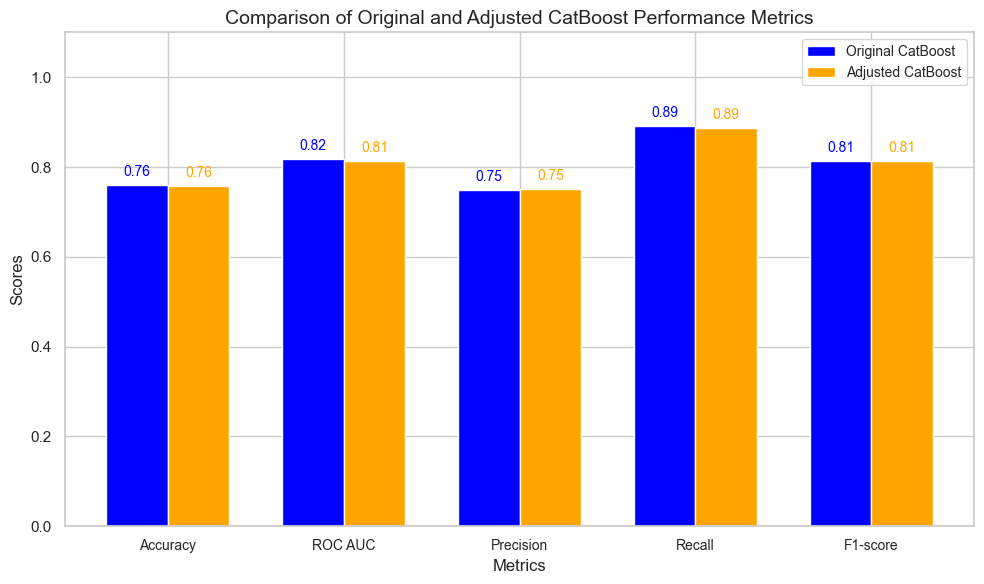

In [25]:
# Calculate Metrics for Original CatBoost
original_catboost_accuracy = accuracy_score(y_test, catboost_model.predict(X_test))
original_catboost_roc_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])
original_catboost_precision = precision_score(y_test, catboost_model.predict(X_test))
original_catboost_recall = recall_score(y_test, catboost_model.predict(X_test))
original_catboost_f1 = f1_score(y_test, catboost_model.predict(X_test))

# Calculate Metrics for Adjusted CatBoost
adjusted_catboost_precision = precision_score(y_test, catboost_adjusted_predictions)
adjusted_catboost_recall = recall_score(y_test, catboost_adjusted_predictions)
adjusted_catboost_f1 = f1_score(y_test, catboost_adjusted_predictions)

# Metrics and Labels
metrics = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score']
original_values = [
    original_catboost_accuracy, original_catboost_roc_auc, original_catboost_precision,
    original_catboost_recall, original_catboost_f1
]
adjusted_values = [
    catboost_adjusted_accuracy, catboost_adjusted_roc_auc, adjusted_catboost_precision,
    adjusted_catboost_recall, adjusted_catboost_f1
]

# Bar Chart
x = np.arange(len(metrics))  # Metric positions
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, original_values, width, label='Original CatBoost', color='blue')
plt.bar(x + width/2, adjusted_values, width, label='Adjusted CatBoost', color='orange')

# Add Labels and Formatting
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Original and Adjusted CatBoost Performance Metrics', fontsize=14)
plt.xticks(x, metrics, fontsize=10)
plt.ylim(0, 1.1)  # Ensure all bars fit in range
plt.legend(fontsize=10)

# Annotate Bar Values
for i, (orig, adj) in enumerate(zip(original_values, adjusted_values)):
    plt.text(i - width/2, orig + 0.02, f"{orig:.2f}", ha='center', fontsize=10, color='blue')
    plt.text(i + width/2, adj + 0.02, f"{adj:.2f}", ha='center', fontsize=10, color='orange')

plt.tight_layout()
plt.show()


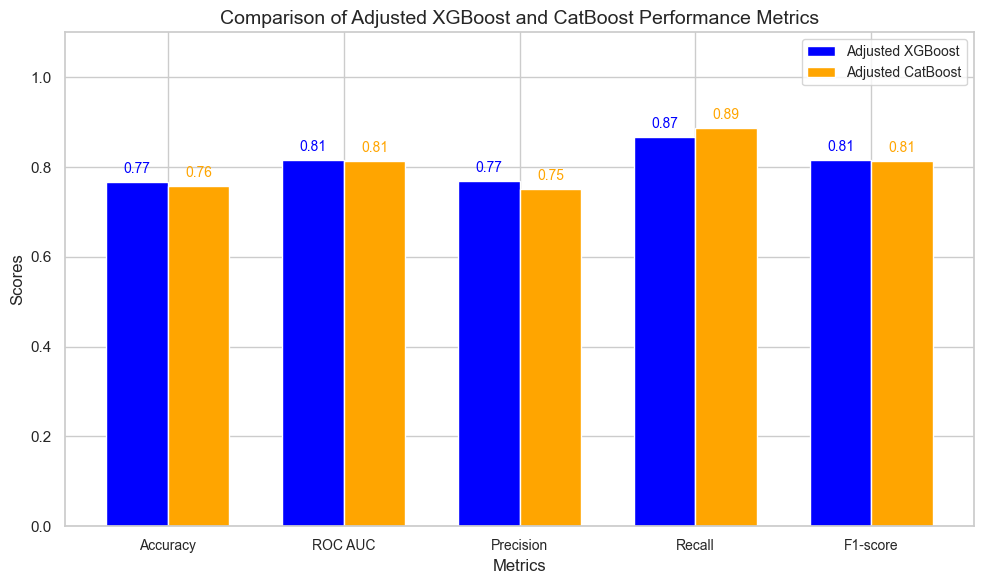

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Adjusted XGBoost
xgb_adjusted_precision = precision_score(y_test, xgb_model_adjusted.predict(X_test))
xgb_adjusted_recall = recall_score(y_test, xgb_model_adjusted.predict(X_test))
xgb_adjusted_f1 = f1_score(y_test, xgb_model_adjusted.predict(X_test))
xgb_adjusted_accuracy = accuracy_score(y_test, xgb_model_adjusted.predict(X_test))
xgb_adjusted_roc_auc = roc_auc_score(y_test, xgb_model_adjusted.predict_proba(X_test)[:, 1])

# Metrics for Adjusted CatBoost
catboost_adjusted_precision = precision_score(y_test, catboost_model_adjusted.predict(X_test))
catboost_adjusted_recall = recall_score(y_test, catboost_model_adjusted.predict(X_test))
catboost_adjusted_f1 = f1_score(y_test, catboost_model_adjusted.predict(X_test))
catboost_adjusted_accuracy = accuracy_score(y_test, catboost_model_adjusted.predict(X_test))
catboost_adjusted_roc_auc = roc_auc_score(y_test, catboost_model_adjusted.predict_proba(X_test)[:, 1])

# Metrics and Labels
metrics = ['Accuracy', 'ROC AUC', 'Precision', 'Recall', 'F1-score']
xgb_values = [
    xgb_adjusted_accuracy, xgb_adjusted_roc_auc, xgb_adjusted_precision,
    xgb_adjusted_recall, xgb_adjusted_f1
]
catboost_values = [
    catboost_adjusted_accuracy, catboost_adjusted_roc_auc, catboost_adjusted_precision,
    catboost_adjusted_recall, catboost_adjusted_f1
]

# Bar Chart
x = np.arange(len(metrics))  # Metric positions
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, xgb_values, width, label='Adjusted XGBoost', color='blue')
plt.bar(x + width/2, catboost_values, width, label='Adjusted CatBoost', color='orange')

# Add Labels and Formatting
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Adjusted XGBoost and CatBoost Performance Metrics', fontsize=14)
plt.xticks(x, metrics, fontsize=10)
plt.ylim(0, 1.1)  # Ensure all bars fit in range
plt.legend(fontsize=10)

# Annotate Bar Values
for i, (xgb, cat) in enumerate(zip(xgb_values, catboost_values)):
    plt.text(i - width/2, xgb + 0.02, f"{xgb:.2f}", ha='center', fontsize=10, color='blue')
    plt.text(i + width/2, cat + 0.02, f"{cat:.2f}", ha='center', fontsize=10, color='orange')

plt.tight_layout()
plt.show()


/var/folders/7p/yc1lsycx5vx8zxzbhm_81gy40000gn/T/ipykernel_42446/3527455971.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


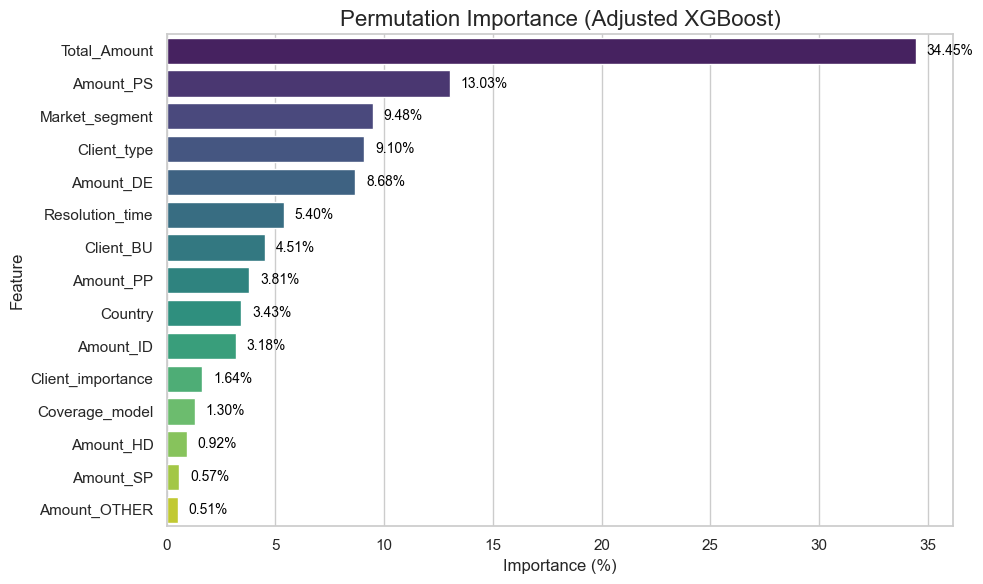

In [27]:
# Calculate permutation importance for the adjusted model
perm_importance_adjusted = permutation_importance(
    xgb_model_adjusted, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42
)

# Create a DataFrame for visualization
perm_importance_adjusted_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Permutation Importance': perm_importance_adjusted['importances_mean']
}).sort_values(by='Permutation Importance', ascending=False)

# Normalize Permutation Importance to Percentages
perm_importance_adjusted_df['Permutation Importance (%)'] = (
    perm_importance_adjusted_df['Permutation Importance'] / perm_importance_adjusted_df['Permutation Importance'].sum() * 100
)

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='Permutation Importance (%)',
    y='Feature',
    data=perm_importance_adjusted_df,
    palette="viridis"
)

# Add annotations for the percentage values along each bar
for patch, importance in zip(barplot.patches, perm_importance_adjusted_df['Permutation Importance (%)']):
    plt.text(
        x=patch.get_width() + 0.5,  # Position slightly to the right of the bar
        y=patch.get_y() + patch.get_height() / 2,  # Center vertically in the bar
        s=f"{importance:.2f}%",  # Format as percentage with 2 decimal places
        va="center",  # Center text vertically
        fontsize=10,  # Font size for annotation
        color="black"  # Text color
    )

# Customize the plot
plt.title("Permutation Importance (Adjusted XGBoost)", fontsize=16)
plt.xlabel("Importance (%)", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


# VI. Hyperparameter tuning - As commented w/mentor, not needed